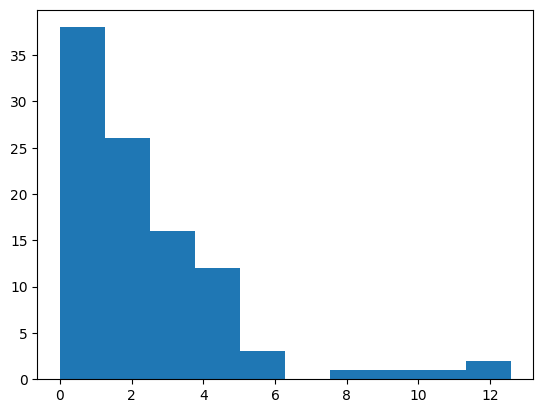

In [12]:
from m2_cw.inference import load_forecast, string_to_array
from m2_cw.preprocessing import load_and_preprocess
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


dir_path = Path.cwd()
file_path = [ file for file in dir_path.iterdir() if "forecast" in str(file) ][0]
forecasts = load_forecast(file_path)
context_texts, gt_texts = load_and_preprocess()

maes = []

for idx, forecast in forecasts.items():
    # Load the ground truth for that series
    gt = gt_texts[idx]
    gt = string_to_array(gt, trim=20)

    # Check they match up
    assert forecast.shape == gt.shape

    mae = np.mean(np.abs(gt - forecast))
    maes.append(mae)

maes = np.array(maes)

plt.hist(maes, bins=10)
plt.show();